In [268]:
import pandas as pd
import seaborn as sns
dataset=pd.read_csv("Reviews.csv")[:10000]

In [181]:
index = dataset["UserId"].value_counts().index

In [267]:
reviewers = dataset.groupby(['UserId','ProfileName']).size().sort_values(ascending=False).reset_index(name='Score Count')

In [265]:
k =[]
for i in index:
    k.append(sector.get_group(i)["Score"].mean())
reviewers['means']=k


In [266]:
reviewers.head(5)

,UserId,ProfileName,Score Count,means
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.714286


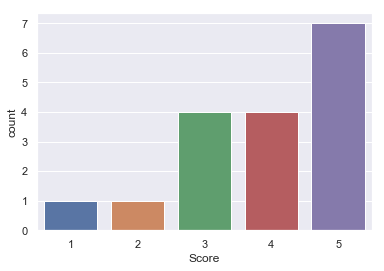

In [274]:
scores = sector.get_group(index[0])["Score"]
sns.set()
sns.countplot(scores)

In [395]:
dataset['Time'] = dataset['Time']/525600
read = dataset['Time'].sort_values(ascending=True)
from collections import defaultdict
from bisect import bisect_left

def count_intervals(sequence, intervals):
    count = defaultdict(int)
    intervals.sort()
    for item in sequence:
        pos = bisect_left(intervals, item)
        if pos == len(intervals):
            count[None] += 1
        else:
            count[intervals[pos]] += 1
    return count


k = [i for i in range(1829,2062,int((2062-1829)/14))]
k.append(0)
print(k)
print(count_intervals(dataset['Time'],k))
print()
print(dataset)

'''
for i in k:
    print(count_intervals(read, [i-int((2062-1829)/14), i]))
    print([i-int((2062-1829)/14), i])
    print()'''
read.head()

[1829, 1845, 1861, 1877, 1893, 1909, 1925, 1941, 1957, 1973, 1989, 2005, 2021, 2037, 2053, 0]
defaultdict(<class 'int'>, {1829: 10000})

         Id   ProductId          UserId                      ProfileName  \
0         1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1         2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2         3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3         4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4         5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5         6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6         7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7         8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8         9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9        10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   
10       11  B0001PB9FE  A3

1244    2.397569e-20
1243    2.398862e-20
8110    2.681030e-20
3782    2.696323e-20
7431    2.701062e-20
Name: Time, dtype: float64

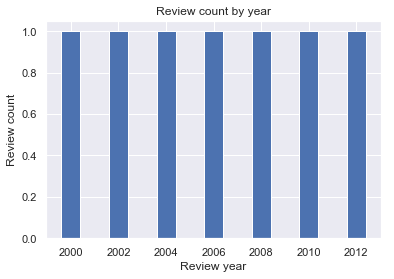

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.900e+01,
        2.200e+01, 5.400e+01, 2.460e+02, 2.970e+02, 3.890e+02, 9.140e+02,
        9.010e+02, 1.774e+03, 2.409e+03, 2.971e+03]),
 array([1829.75342466, 1876.06849315, 1922.38356164, 1968.69863014,
        2015.01369863, 2061.32876712, 2107.64383562, 2153.95890411,
        2200.2739726 , 2246.5890411 , 2292.90410959, 2339.21917808,
        2385.53424658, 2431.84931507, 2478.16438356, 2524.47945205,
        2570.79452055]),
 <a list of 16 Patch objects>)

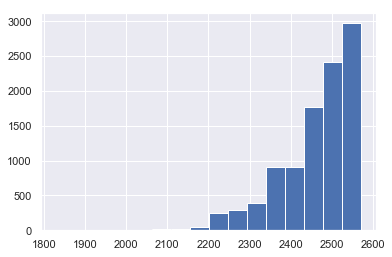

In [355]:
import matplotlib.pyplot as plt
plt.title('Review count by year')
plt.xlabel('Review year')
plt.ylabel('Review count')
x = [i for i in range(2000,2014,2)]

plt.bar(x,1)
plt.show()
#sns.set()
plt.hist(read,bins = 16)

In [356]:
sns.set()
for 
sns.heatmap(dataset,annot = True)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''